# Comprehensive Exploratory Data Analysis: Step by Step

## Table of Contents
- [1 - Packages](#1)
- [2 - Data Overview](#2)
    - [2.1 - Load the Data](#2-1)
    - [2.2 - Basic Information](#2-2)
- [3 - Univariate Analysis](#3)
    - [3.1 - Categorical Variables](#3-1)
    - [3.2 - Continuous Variables](#3-2)
- [4 - Handling Missing Data](#4)
    - [4.1 - Identifying Missing Data](#4-1)
    - [4.2 - Strategies for Handling Missing Data](#4-2)
- [5 - Bivariate Analysis](#5)
    - [5.1 - Correlation Analysis](#5-1)
    - [5.2 - Visualizing Relationships](#5-2)
- [6 - Outlier Detection](#6)
    - [6.1 - Identifying Outliers](#6-1)
    - [6.2 - Handling Outliers](#6-2)
- [7 - Feature Engineering](#7)
    - [7.1 - Creating New Features](#7-1)
    - [7.2 - Transforming Features](#7-2)
- [8 - Preparing Data for Modeling](#8)
    - [8.1 - Data Encoding](#8-1)
    - [8.2 - Data Splitting](#8-2)

<a name='1'></a>
## 1 - Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

import os
# import wandb
import warnings

from config import *
from utils.eda_functions import *
from src.data_preprocessing.demographics import *
from src.data_preprocessing.vitals_labs import *
from utils.safe_display import blind_display

%load_ext autoreload
%autoreload 2

In [2]:
# Configuration & Settings:

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

warnings.filterwarnings('ignore')
os.environ['WANDB_SILENT'] = 'true'
sns.set_theme(style="whitegrid")

# # Login and initialize a new wandb run
# wandb_key = os.environ.get("WANDB_API_KEY")
# ! wandb login $wandb_key
#
# run = wandb.init(
#     project='FuzzyMedNet',
#     name='patient_eda',
#     job_type='eda'
# )

In [3]:
# Safety flag - when set to True will not display sensitive data
BLINDED = False

<a name='2'></a>
## 2 - Data Overview

<a name='2-1'></a>
### 2.1 - Loading the Data

In [4]:
# Open the file in read mode
with h5py.File(DATA_FILE_PATH, 'r') as file:
    # Print the keys at the root of the file
    print(list(file.keys()))

patients = pd.read_hdf(DATA_FILE_PATH, 'patients')
vitals_labs = pd.read_hdf(DATA_FILE_PATH, 'vitals_labs')
vitals_labs_mean = pd.read_hdf(DATA_FILE_PATH, 'vitals_labs_mean')
interventions = pd.read_hdf(DATA_FILE_PATH, 'interventions')
codes = pd.read_hdf(DATA_FILE_PATH, 'codes')

['codes', 'interventions', 'patients', 'vitals_labs', 'vitals_labs_mean']


<a name='2-2'></a>
### 2.2 - Basic Information

In [5]:
print(f'patients.shape: {patients.shape}')
print(patients.info())

patients.shape: (34472, 28)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 34472 entries, (3, 145834, 211552) to (99999, 113369, 246512)
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  34472 non-null  category      
 1   ethnicity               34472 non-null  category      
 2   age                     34472 non-null  float64       
 3   insurance               34472 non-null  object        
 4   admittime               34472 non-null  datetime64[ns]
 5   diagnosis_at_admission  34471 non-null  object        
 6   dischtime               34472 non-null  datetime64[ns]
 7   discharge_location      34472 non-null  object        
 8   fullcode_first          28162 non-null  float64       
 9   dnr_first               28162 non-null  float64       
 10  fullcode                28162 non-null  float64       
 11  dnr                     28162 non-null  fl

In [6]:
print(f'vitals_labs_mean.shape: {vitals_labs_mean.shape}')
print(vitals_labs_mean.info())

vitals_labs_mean.shape: (2200954, 104)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2200954 entries, (3, 145834, 211552, 0) to (99999, 113369, 246512, 26)
Columns: 104 entries, ('alanine aminotransferase', 'mean') to ('ph urine', 'mean')
dtypes: float64(104)
memory usage: 1.7 GB
None


In [7]:
print(f'interventions.shape: {interventions.shape}')
print(interventions.info())

interventions.shape: (2200954, 14)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2200954 entries, (3, 145834, 211552, 0) to (99999, 113369, 246512, 26)
Data columns (total 14 columns):
 #   Column             Dtype
---  ------             -----
 0   vent               int64
 1   vaso               int64
 2   adenosine          int64
 3   dobutamine         int64
 4   dopamine           int64
 5   epinephrine        int64
 6   isuprel            int64
 7   milrinone          int64
 8   norepinephrine     int64
 9   phenylephrine      int64
 10  vasopressin        int64
 11  colloid_bolus      int64
 12  crystalloid_bolus  int64
 13  nivdurations       int64
dtypes: int64(14)
memory usage: 269.0 MB
None


In [8]:
blind_display(patients, vitals_labs_mean, interventions, codes, blinded=BLINDED)

patients.shape:  (34472, 28)


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,
3,145834,211552,M,WHITE,76.526792,Medicare,2101-10-20 19:08:00,HYPOTENSION,2101-10-31 13:58:00,SNF,1.0,0.0,...,2101-10-26 20:43:09,6.064560,EMERGENCY,MICU,0,0,0,1,0,145
4,185777,294638,F,WHITE,47.845047,Private,2191-03-16 00:28:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",2191-03-23 18:41:00,HOME WITH HOME IV PROVIDR,1.0,0.0,...,2191-03-17 16:46:31,1.678472,EMERGENCY,MICU,0,0,0,1,0,40
6,107064,228232,F,WHITE,65.942297,Medicare,2175-05-30 07:15:00,CHRONIC RENAL FAILURE/SDA,2175-06-15 16:00:00,HOME HEALTH CARE,1.0,0.0,...,2175-06-03 13:39:54,3.672917,ELECTIVE,SICU,0,0,0,1,0,88
9,150750,220597,M,UNKNOWN/NOT SPECIFIED,41.790228,Medicaid,2149-11-09 13:06:00,HEMORRHAGIC CVA,2149-11-14 10:15:00,DEAD/EXPIRED,1.0,0.0,...,2149-11-14 20:52:14,5.323056,EMERGENCY,MICU,1,1,1,1,0,127
11,194540,229441,F,WHITE,50.148295,Private,2178-04-16 06:18:00,BRAIN MASS,2178-05-11 19:00:00,HOME HEALTH CARE,1.0,0.0,...,2178-04-17 20:21:05,1.584410,EMERGENCY,SICU,0,0,0,1,0,38


vitals_labs_mean.shape:  (2200954, 104)


LEVEL2                                 alanine aminotransferase albumin  \
Aggregation Function                                       mean    mean   
subject_id hadm_id icustay_id hours_in                                    
3          145834  211552     0                            25.0     1.8   
                              1                             NaN     NaN   
                              2                             NaN     NaN   
                              3                             NaN     NaN   
                              4                             NaN     NaN   

LEVEL2                                 albumin ascites albumin pleural  \
Aggregation Function                              mean            mean   
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0                    NaN             NaN   
                              1                    NaN             NaN   
                              2                    NaN             NaN   
                              3                    NaN             NaN   
                              4                    NaN             NaN   

LEVEL2                                 albumin urine alkaline phosphate  \
Aggregation Function                            mean               mean   
subject_id hadm_id icustay_id hours_in                                    
3          145834  211552     0                  NaN               73.0   
                              1                  NaN                NaN   
                              2                  NaN                NaN   
                              3                  NaN                NaN   
                              4                  NaN                NaN   

LEVEL2                                  anion gap asparate aminotransferase  \
Aggregation Function                         mean                      mean   
subject_id hadm_id icustay_id hours_in                                        
3          145834  211552     0         20.666667                      69.0   
                              1               NaN                       NaN   
                              2               NaN                       NaN   
                              3               NaN                       NaN   
                              4               NaN                       NaN   

LEVEL2                                 basophils bicarbonate  ...  \
Aggregation Function                        mean        mean  ...   
subject_id hadm_id icustay_id hours_in                        ...   
3          145834  211552     0              NaN   16.333333  ...   
                              1              NaN         NaN  ...   
                              2              NaN         NaN  ...   
                              3              NaN         NaN  ...   
                              4              NaN         NaN  ...   

LEVEL2                                 total protein total protein urine  \
Aggregation Function                            mean                mean   
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0                  NaN                 NaN   
                              1                  NaN                 NaN   
                              2                  NaN                 NaN   
                              3                  NaN                 NaN   
                              4                  NaN                 NaN   

LEVEL2                                 troponin-i troponin-t venous pvo2  \
Aggregation Function                         mean       mean        mean   
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0               NaN        NaN         NaN   
                              1               NaN        NaN         NaN   
                              

interventions.shape:  (2200954, 14)


vent  vaso  adenosine  dobutamine  \
subject_id hadm_id icustay_id hours_in                                      
3          145834  211552     0            1     0          0           0   
                              1            1     1          0           0   
                              2            1     1          0           0   
                              3            1     1          0           0   
                              4            1     1          0           0   

                                        dopamine  epinephrine  isuprel  \
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0                0            0        0   
                              1                1            0        0   
                              2                1            0        0   
                              3                0            0        0   
                              4                0            0        0   

                                        milrinone  norepinephrine  \
subject_id hadm_id icustay_id hours_in                              
3          145834  211552     0                 0               0   
                              1                 0               0   
                              2                 0               0   
                              3                 0               0   
                              4                 0               1   

                                        phenylephrine  vasopressin  \
subject_id hadm_id icustay_id hours_in                               
3          145834  211552     0                     0            0   
                              1                     1            0   
                              2                     1            0   
                              3                     1            0   
                              4                     1            0   

                                        colloid_bolus  crystalloid_bolus  \
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0                     0                  0   
                              1                     0                  0   
                              2                     0                  0   
                              3                     0                  0   
                              4                     0                  0   

                                        nivdurations  
subject_id hadm_id icustay_id hours_in                
3          145834  211552     0                    0  
                              1                    0  
                              2                    0  
                              3                    0  
                              4                    0

codes.shape:  (2200954, 1)


icd9_codes
subject_id hadm_id icustay_id hours_in                                                   
3          145834  211552     0         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              1         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              2         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              3         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...
                              4         [0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...

<a name='3'></a>
## 3 - Univariate Analysis

<a name='3-1'></a>
### 3.1 - Categorical Variables

`patients` DataFrame

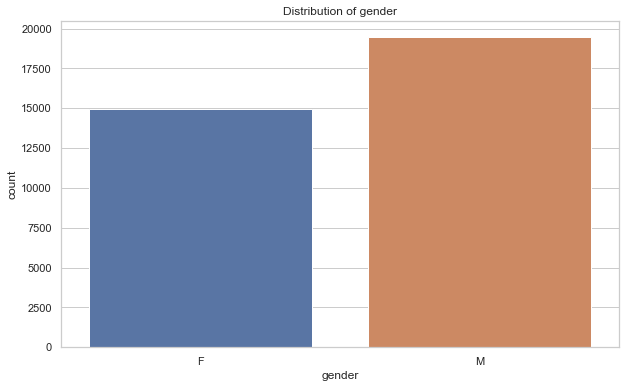

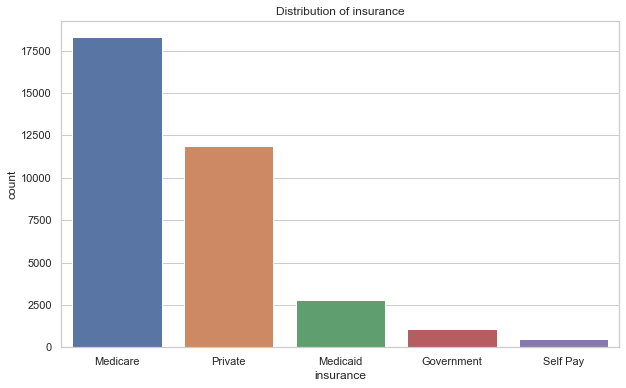

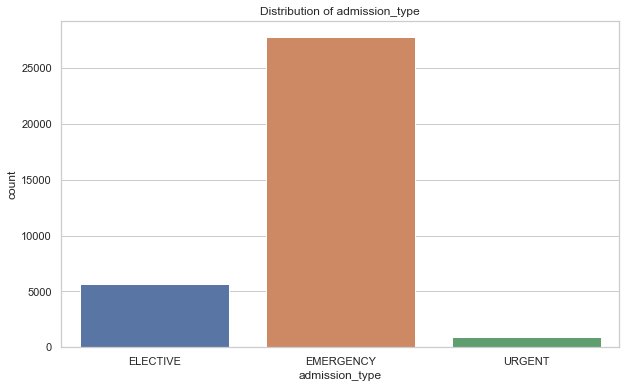

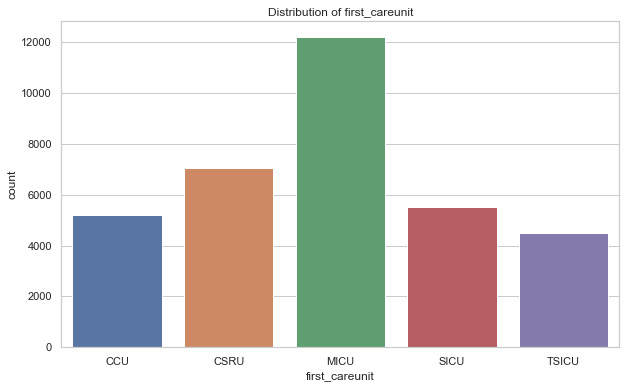

In [9]:
patient_categorical_vars = ["gender", "insurance", "admission_type", "first_careunit"]
plot_categorical_columns(patients, patient_categorical_vars)

In [10]:
# check ethnicity categories
patients['ethnicity'].value_counts(dropna=False)

WHITE                                                       24429
UNKNOWN/NOT SPECIFIED                                        3221
BLACK/AFRICAN AMERICAN                                       2456
HISPANIC OR LATINO                                            881
OTHER                                                         785
UNABLE TO OBTAIN                                              652
ASIAN                                                         545
PATIENT DECLINED TO ANSWER                                    351
ASIAN - CHINESE                                               166
HISPANIC/LATINO - PUERTO RICAN                                124
BLACK/CAPE VERDEAN                                            122
WHITE - RUSSIAN                                                99
MULTI RACE ETHNICITY                                           77
BLACK/HAITIAN                                                  64
WHITE - OTHER EUROPEAN                                         59
HISPANIC/L

In [11]:
# Regroup similar categories of ethnicities
patients['ethnicity'] = patients['ethnicity'].apply(categorize_ethnicity)
patients['ethnicity'].value_counts(dropna=False)

WHITE              24675
OTHER/UNKNOWN       5086
BLACK               2667
HISPANIC            1137
ASIAN                865
ISLANDER              25
NATIVE AMERICAN       17
Name: ethnicity, dtype: int64

In [12]:
# regroup admission types into: EMERGENCY & ELECTIVE
patients['admission_type'] = patients['admission_type'].apply(group_admission_type)
patients['admission_type'].value_counts(dropna=False)

EMERGENCY    28767
ELECTIVE      5705
Name: admission_type, dtype: int64

<a name='3-2'></a>
### 3.2 - Continuous Variables

`patients` DataFrame

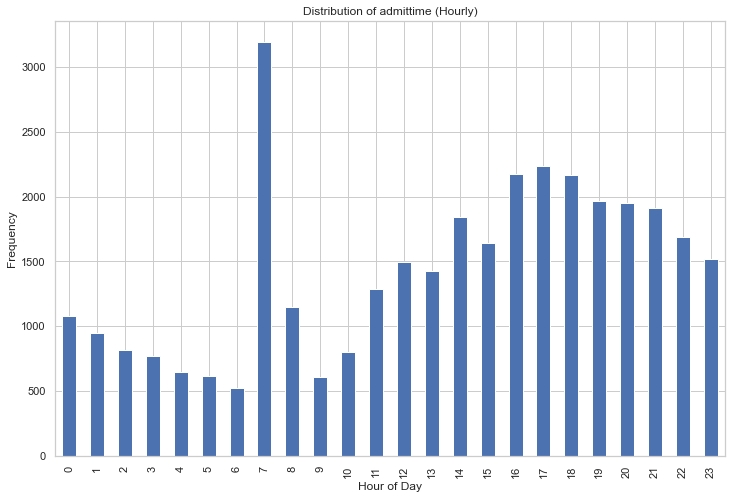

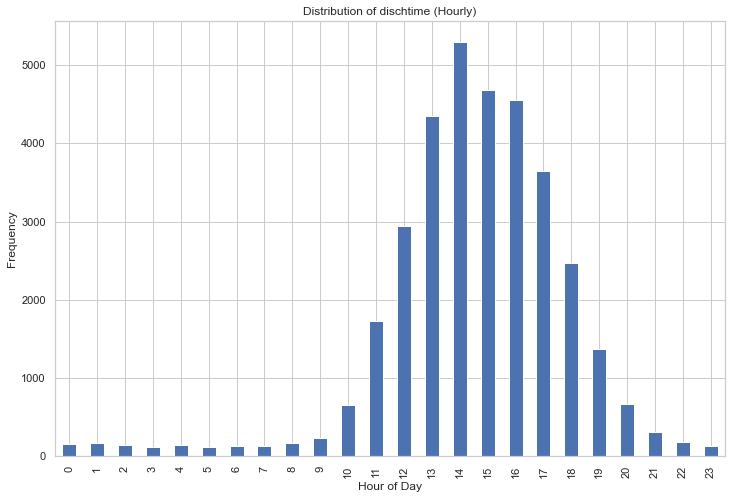

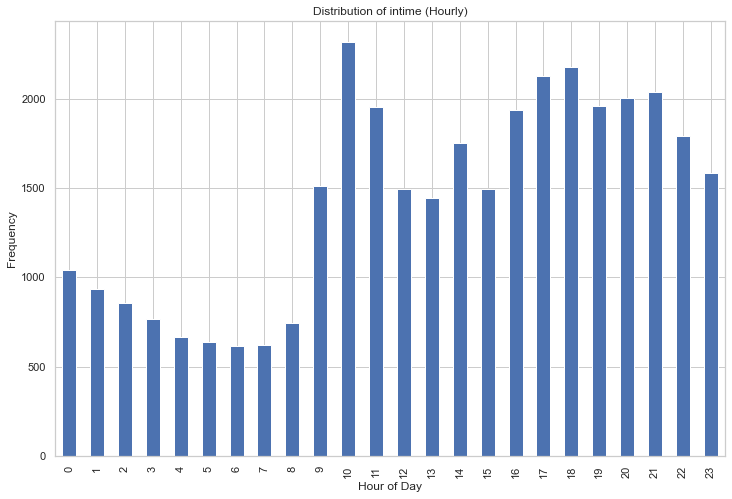

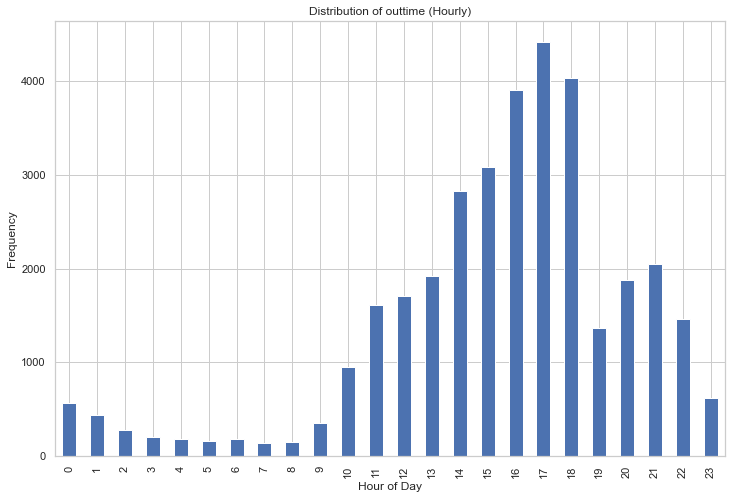

In [13]:
# Calculate length of stay in ICU
patients['icu_stay_length'] = calculate_duration(patients, 'intime', 'outtime', 'h')  # in hours

# Plot distribution of times
time_columns = ['admittime', 'dischtime', 'intime', 'outtime']
plot_time_analysis(patients, time_columns)

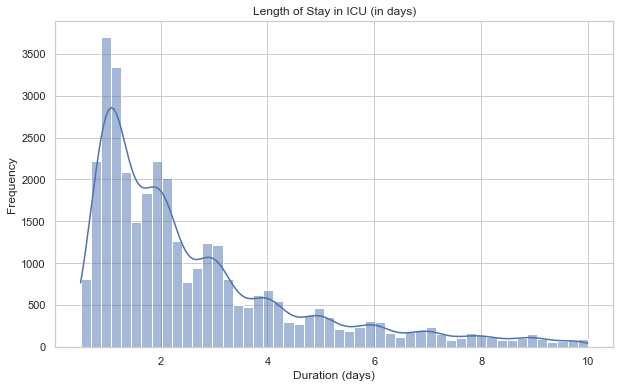

In [14]:
# Plot distribution of length of stay in ICU
plt.figure(figsize=(10,6))
sns.histplot(data=patients, x='los_icu', bins=50, kde=True)
plt.title('Length of Stay in ICU (in days)')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

`vitals_labs_mean` DataFrame
1. **Descriptive Statistics**
We'll start by calculating summary statistics for the DataFrame. This will help us understand the central tendency, spread, and shape of the distribution of the dataset.
<br></br>
2. **Time-Series Plots**
For selected vital signs and lab measurements, we'll plot time-series graphs.
<br></br>
3. **Distribution Plots**
We'll visualize the distribution of selected columns to understand their shape, center, and spread.

In [15]:
vitals_labs_mean.describe()

LEVEL2,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine,ph,ph urine
Aggregation Function,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
count,43419.000000,28660.000000,114.000000,146.000000,131.000000,42244.000000,183732.000000,43439.000000,18593.000000,192632.000000,...,423.000000,872.000000,2027.000000,28427.000000,956.000000,61858.000000,178844.000000,5574.000000,201128.000000,23458.000000
mean,282.336995,3.079365,1.707018,1.713699,46.022137,122.315145,13.719931,348.145131,0.394192,24.234930,...,5.660993,139.375000,7.557382,0.850707,43.877092,83.073052,11.935059,23.313132,7.381335,5.809969
std,916.366506,0.684541,0.809755,0.573511,93.149753,143.607810,3.990472,1239.590637,0.487494,4.743463,...,1.091161,307.540901,10.657161,2.151251,14.872488,23.357670,10.007226,72.205027,0.078646,0.945936
min,2.000000,1.000000,0.200000,0.300000,0.400000,20.000000,5.000000,6.000000,0.100000,0.000000,...,3.300000,6.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.100000,6.500000,1.000000
25%,20.000000,2.600000,1.125000,1.225000,3.450000,61.000000,11.000000,27.000000,0.200000,22.000000,...,5.000000,22.000000,0.800000,0.030000,34.000000,67.267748,7.800000,2.000000,7.340000,5.000000
50%,39.000000,3.100000,1.500000,1.700000,9.800000,84.000000,13.000000,52.500000,0.300000,24.000000,...,5.600000,52.000000,2.600000,0.110000,41.000000,80.099998,10.600000,5.000000,7.390000,5.500000
75%,114.000000,3.600000,2.200000,2.100000,39.450000,129.000000,15.000000,143.666667,0.500000,27.000000,...,6.200000,121.000000,9.880000,0.530000,50.000000,95.473395,14.200000,14.000000,7.430000,6.500000
max,10000.000000,6.000000,5.000000,3.400000,589.000000,3625.000000,50.000000,20000.000000,40.000000,53.000000,...,13.200000,3790.000000,49.600000,20.850000,100.000000,250.000000,939.000000,929.000000,8.400000,10.000000


**Mean and Standard Deviation**
Alanine Aminotransferase: The mean value is 282.34, but the standard deviation is very high (916.37), indicating a wide spread of values.
Albumin: Has a mean of 3.08 and a standard deviation of 0.68, showing that the data points are relatively closely packed around the mean.
Anion Gap: Mean is around 13.72 with a standard deviation of 3.99.

**Min, Max, and Outliers**
Alanine Aminotransferase: The max value is 10000, which seems excessively high and could potentially be an outlier.
White Blood Cell Count: The max value is 939, which is much higher than the 75th percentile (14.2), indicating potential outliers.

**Missing Data**
Albumin Ascites: Count is only 114, suggesting a large number of missing values.
Albumin Pleural: Also has a low count of 146, indicating many missing values.

**Quartiles (25%, 50%, 75%)**
pH: The interquartile range (IQR) is very small (7.43 - 7.34 = 0.09), indicating that the majority of the pH values are close to each other.
Weight: The 25th percentile is 67.27 and the 75th percentile is 95.47, suggesting that most patients' weight falls within this range.

In [16]:
# vitals_mean = pd.DataFrame(vitals_labs.mean(),columns=['mean'])
# vitals_std = pd.DataFrame(vitals_labs.std(),columns=['stdev'])
# vitals_missing = pd.DataFrame(vitals_labs.isnull().sum()/vitals_labs.shape[0]*100,columns=['missing percent'])
#
# vitals_summary = pd.concat([vitals_mean,vitals_std,vitals_missing],axis=1)
# vitals_summary.index = vitals_summary.index.droplevel(1)
# vitals_summary.sort_values(by='missing percent', ascending=True, inplace=True)

In [17]:
# Filter data to a 30-hour period
vitals_labs_filtered = vitals_labs_mean[vitals_labs_mean.index.get_level_values('hours_in') <= 30]

# Flatten the multi-level column names
vitals_labs_flatten = vitals_labs_filtered.copy()
vitals_labs_flatten.columns = [col[0] for col in vitals_labs_filtered.columns.values]
blind_display(vitals_labs_flatten, blinded=BLINDED)

vitals_labs_flatten.shape:  (995849, 104)


alanine aminotransferase  albumin  \
subject_id hadm_id icustay_id hours_in                                      
3          145834  211552     0                             25.0      1.8   
                              1                              NaN      NaN   
                              2                              NaN      NaN   
                              3                              NaN      NaN   
                              4                              NaN      NaN   

                                        albumin ascites  albumin pleural  \
subject_id hadm_id icustay_id hours_in                                     
3          145834  211552     0                     NaN              NaN   
                              1                     NaN              NaN   
                              2                     NaN              NaN   
                              3                     NaN              NaN   
                              4                     NaN              NaN   

                                        albumin urine  alkaline phosphate  \
subject_id hadm_id icustay_id hours_in                                      
3          145834  211552     0                   NaN                73.0   
                              1                   NaN                 NaN   
                              2                   NaN                 NaN   
                              3                   NaN                 NaN   
                              4                   NaN                 NaN   

                                        anion gap  asparate aminotransferase  \
subject_id hadm_id icustay_id hours_in                                         
3          145834  211552     0         20.666667                       69.0   
                              1               NaN                        NaN   
                              2               NaN                        NaN   
                              3               NaN                        NaN   
                              4               NaN                        NaN   

                                        basophils  bicarbonate  ...  \
subject_id hadm_id icustay_id hours_in                          ...   
3          145834  211552     0               NaN    16.333333  ...   
                              1               NaN          NaN  ...   
                              2               NaN          NaN  ...   
                              3               NaN          NaN  ...   
                              4               NaN          NaN  ...   

                                        total protein  total protein urine  \
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                   NaN                  NaN   
                              1                   NaN                  NaN   
                              2                   NaN                  NaN   
                              3                   NaN                  NaN   
                              4                   NaN                  NaN   

                                        troponin-i  troponin-t  venous pvo2  \
subject_id hadm_id icustay_id hours_in                                        
3          145834  211552     0                NaN         NaN          NaN   
                              1                NaN         NaN          NaN   
                              2                NaN         NaN          NaN   
                              3                NaN         NaN          NaN   
                              4                NaN         NaN          NaN   

                                        weight  white blood cell count  \
subject_id hadm_id icustay_id hours_in                                   
3          145834  211552     0            NaN               14.842857   
                              1            Na

In [20]:
# Reset the index to make 'subject_id', 'hadm_id', 'icustay_id', 'hours_in' regular columns
reset_df = vitals_labs.reset_index()
reduced_df = reset_df.groupby(['subject_id', 'hadm_id', 'icustay_id']).mean().reset_index()
reduced_df.drop(columns='hours_in', inplace=True)

melted_df = pd.melt(reduced_df, id_vars=['subject_id', 'hadm_id', 'icustay_id'], var_name=['LEVEL2', 'Aggregation Function'], value_name='Value')
melted_df.reset_index(drop=True, inplace=True)

vitals_summary = melted_df.groupby(['LEVEL2', 'Aggregation Function']).mean().reset_index()
vitals_summary.pivot_table(index='LEVEL2', columns='Aggregation Function', values='Value', aggfunc=np.mean)
vitals_summary.drop(columns=['count'], inplace=True)

vitals_missing = vitals_labs_mean.isnull().sum() / vitals_labs_mean.shape[0] * 100
vitals_missing = vitals_missing.reset_index()
vitals_missing.drop(columns=['Aggregation Function'], inplace=True)
vitals_missing.rename(columns={0: 'missing percent'}, inplace=True)

vitals_pivot = pd.merge(vitals_summary, vitals_missing, on=['LEVEL2'])
vitals_pivot.rename(columns={'LEVEL2': 'measurement'}, inplace=True)
vitals_pivot.sort_values(by='missing percent', ascending=True, inplace=True)
vitals_pivot.reset_index(drop=True, inplace=True)

vitals_range = pd.read_csv('../resources/vitals_labs_ranges.csv')
vitals_range.columns = vitals_range.columns.str.lower()

merged_vitals = pd.merge(vitals_pivot, vitals_range[['measurement', 'valid low', 'valid high']], on=['measurement'], how='left')
merged_vitals

merged_vitals.to_csv('../resources/vitals_labs_stats.csv')
merged_vitals

LEVEL2               subject_id hadm_id icustay_id hours_in  \
Aggregation Function                                          
0                             3  145834     211552        0   
1                             3  145834     211552        1   
2                             3  145834     211552        2   
3                             3  145834     211552        3   
4                             3  145834     211552        4   
...                         ...     ...        ...      ...   
2200949                   99999  113369     246512       22   
2200950                   99999  113369     246512       23   
2200951                   99999  113369     246512       24   
2200952                   99999  113369     246512       25   
2200953                   99999  113369     246512       26   

LEVEL2               alanine aminotransferase            albumin            \
Aggregation Function                    count  mean  std   count mean  std   
0                                         2.0  25.0  0.0     2.0  1.8  0.0   
1                                         0.0   NaN  NaN     0.0  NaN  NaN   
2                                         0.0   NaN  NaN     0.0  NaN  NaN   
3                                         0.0   NaN  NaN     0.0  NaN  NaN   
4                                         0.0   NaN  NaN     0.0  NaN  NaN   
...                                       ...   ...  ...     ...  ...  ...   
2200949                                   0.0   NaN  NaN     0.0  NaN  NaN   
2200950                                   0.0   NaN  NaN     0.0  NaN  NaN   
2200951                                   0.0   NaN  NaN     0.0  NaN  NaN   
2200952                                   0.0   NaN  NaN     0.0  NaN  NaN   
2200953                                   0.0   NaN  NaN     0.0  NaN  NaN   

LEVEL2                ... white blood cell count white blood cell count urine  \
Aggregation Function  ...                    std                        count   
0                     ...               4.012837                          0.0   
1                     ...                    NaN                          0.0   
2                     ...                    NaN                          0.0   
3                     ...                    NaN                          0.0   
4                     ...                    NaN                          0.0   
...                   ...                    ...                          ...   
2200949               ...                    NaN                          0.0   
2200950               ...                    NaN                          0.0   
2200951               ...                    NaN                          0.0   
2200952               ...                    NaN                          0.0   
2200953               ...                    NaN                          0.0   

LEVEL2                           ph                 ph urine           
Aggregation Function mean std count  mean       std    count mean std  
0                     NaN NaN   9.0  7.40  0.147733      1.0  5.0 NaN  
1                     NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
2                     NaN NaN   3.0  7.26  0.000000      0.0  NaN NaN  
3                     NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
4                     NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
...                   ...  ..   ...   ...       ...      ...  ...  ..  
2200949               NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
2200950               NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
2200951               NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
2200952               NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  
2200953               NaN NaN   0.0   NaN       NaN      0.0  NaN NaN  

[2200954 rows x 316 columns]

### Anomalies and Risk Indicators Based on Mean/Std

#### Heart Rate
- **Mean**: 83.92
- **Standard Deviation**: 4.18

**Analysis**:
The mean heart rate appears to be within the normal range for adults. However, the relatively low standard deviation suggests that the data is tightly clustered, which might indicate a lack of variation that could be expected in a diverse patient population.

#### Respiratory Rate
- **Mean**: 18.71
- **Standard Deviation**: 3.48

**Analysis**:
The mean respiratory rate is higher than the typical adult range (12-16). A higher respiratory rate could indicate respiratory distress or other underlying conditions. The moderate standard deviation suggests a range of measurements around this high mean, which could be a concern.

#### Systolic Blood Pressure
- **Mean**: 120.90
- **Standard Deviation**: 9.38

**Analysis**:
The mean systolic blood pressure is at the upper limit of the normal range (90-120 mm Hg). The standard deviation suggests that some measurements could be in the hypertensive range, warranting further investigation.

#### Diastolic Blood Pressure
- **Mean**: 60.94
- **Standard Deviation**: 6.27

**Analysis**:
The mean diastolic blood pressure is within the normal range. The standard deviation is low, suggesting that the data is tightly clustered around this mean. No immediate concerns here.

#### Mean Blood Pressure
- **Mean**: 78.82
- **Standard Deviation**: 7.01

**Analysis**:
The mean blood pressure is within the typical range. However, the moderate standard deviation suggests that some patients may have values outside of the typical range, possibly requiring medical attention.

#### Temperature
- **Mean**: 36.8
- **Standard Deviation**: 0.41

**Analysis**:
The mean temperature is within the normal range (36.5–37.5°C), but the low standard deviation suggests the data is closely packed around this mean. This could either be a good indicator of overall patient stability or a sign that the population isn't diverse in terms of temperature-related conditions.

#### Oxygen Saturation
- **Mean**: 97.3
- **Standard Deviation**: 1.2

**Analysis**:
The mean oxygen saturation is very high, close to the maximum of 100. This suggests that, on average, patients are well-oxygenated. The low standard deviation indicates that this holds true across the dataset, with few outliers.

#### Fraction Inspired Oxygen
- **Mean**: 0.5
- **Standard Deviation**: 0.1

**Analysis**:
The mean is at the midpoint of possible values (0-1), suggesting a balanced mix of patients requiring varying levels of oxygen support. However, the standard deviation is relatively low, indicating that most patients are close to this mean value.

#### Glascow Coma Scale Total
- **Mean**: 13.2
- **Standard Deviation**: 2.1

**Analysis**:
The mean Glasgow Coma Scale score is lower than the maximum of 15, indicating some level of impaired consciousness or neurological function across the dataset. The moderate standard deviation suggests a range of neurological statuses.

#### Pulmonary Artery Pressure Mean
- **Mean**: 25.1
- **Standard Deviation**: 4.2

**Analysis**:
The mean value is within the normal range (10-20 mmHg), but the higher standard deviation may indicate a more varied patient population in terms of pulmonary artery pressure, potentially showing some cases of pulmonary hypertension.

#### Pulmonary Artery Pressure Systolic
- **Mean**: 35.7
- **Standard Deviation**: 5.3

**Analysis**:
The mean value is on the higher end of the normal range (15-30 mmHg). The standard deviation suggests some patients might have elevated systolic pulmonary artery pressures, which could be concerning.

#### Pulmonary Capillary Wedge Pressure
- **Mean**: 12.4
- **Standard Deviation**: 3.1

**Analysis**:
The mean value is within the normal range (4-12 mmHg), but the higher standard deviation indicates variation that may involve elevated levels, potentially signaling heart issues in some patients.

#### Positive End-Expiratory Pressure
- **Mean**: 5.2
- **Standard Deviation**: 1.7

**Analysis**:
The mean value is within the normal range for mechanical ventilation (5-20 cmH2O). However, the standard deviation indicates a variety of ventilation strategies being employed, which could be reflective of different severities of respiratory issues.

#### Peak Inspiratory Pressure
- **Mean**: 22.6
- **Standard Deviation**: 6.1

**Analysis**:
The mean value is within the normal range, but the higher standard deviation suggests that some patients might have high inspiratory pressures, which could be a cause for concern.


In summary, the respiratory rate seems to be at the highest risk based on its mean value, which is higher than typically expected. The systolic blood pressure also warrants attention due to its mean value being at the upper limit of the normal range.

Based on the mean and standard deviation values, measurements like the Glascow Coma Scale, Pulmonary Artery Pressure, and Positive End-Expiratory Pressure may require more immediate medical attention or suggest a more complicated patient population.

In [ ]:
# Next, check at which hours is data most gathered

In [19]:
# plot_hourly_distributions(df=vitals_labs_flatten, features=VITAL_SIGNS,valid_ranges=variable_ranges_df)

<a name='4'></a>
## 4 - Handling Missing Data

<a name='4-1'></a>
### 4.1 - Identifying Missing Data

<a name='4-2'></a>
### 4.2 - Strategies for Handling Missing Data

<a name='5'></a>
## 5 - Bivariate Analysis

<a name='5-1'></a>
### 5.1 - Correlation Analysis

<a name='5-2'></a>
### 5.2 - Visualizing Relationships

<a name='6'></a>
## 6 - Outlier Detection

<a name='6-1'></a>
### 6.1 - Identifying Outliers

<a name='6-2'></a>
### 6.2 - Handling Outliers

<a name='7'></a>
## 7 - Feature Engineering

<a name='7-1'></a>
### 7.1 - Creating New Features

<a name='7-2'></a>
### 7.2 - Transforming Features

<a name='8'></a>
## 8 - Preparing Data for Modeling

<a name='8-1'></a>
### 8.1 - Data Encoding

<a name='8-2'></a>
### 8.2 - Data Splitting